## Diabetes Data Analysis and Prediction

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('diabetes.csv')# Load your dataset
df.rename(columns={'Outcome':'label'},inplace=True)
df.columns = df.columns.str.lower()
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
df.shape

(768, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   label                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
label                       0
dtype: int64

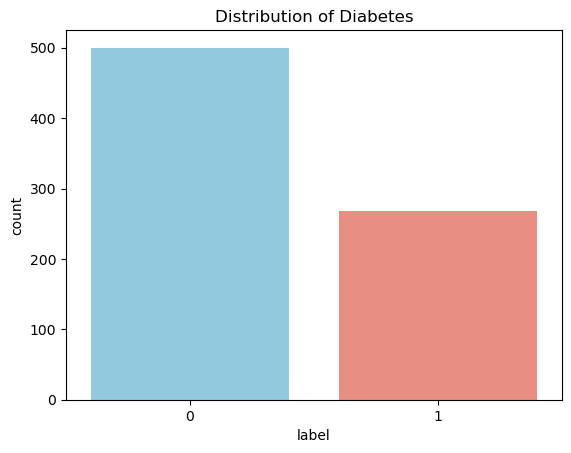

In [59]:
# Visualize the distribution of the target variable (diabetes)
custom_palette = {0: "skyblue", 1: "salmon"}  

sns.countplot(x='label', data=df,palette=custom_palette)
plt.title('Distribution of Diabetes')
plt.show()

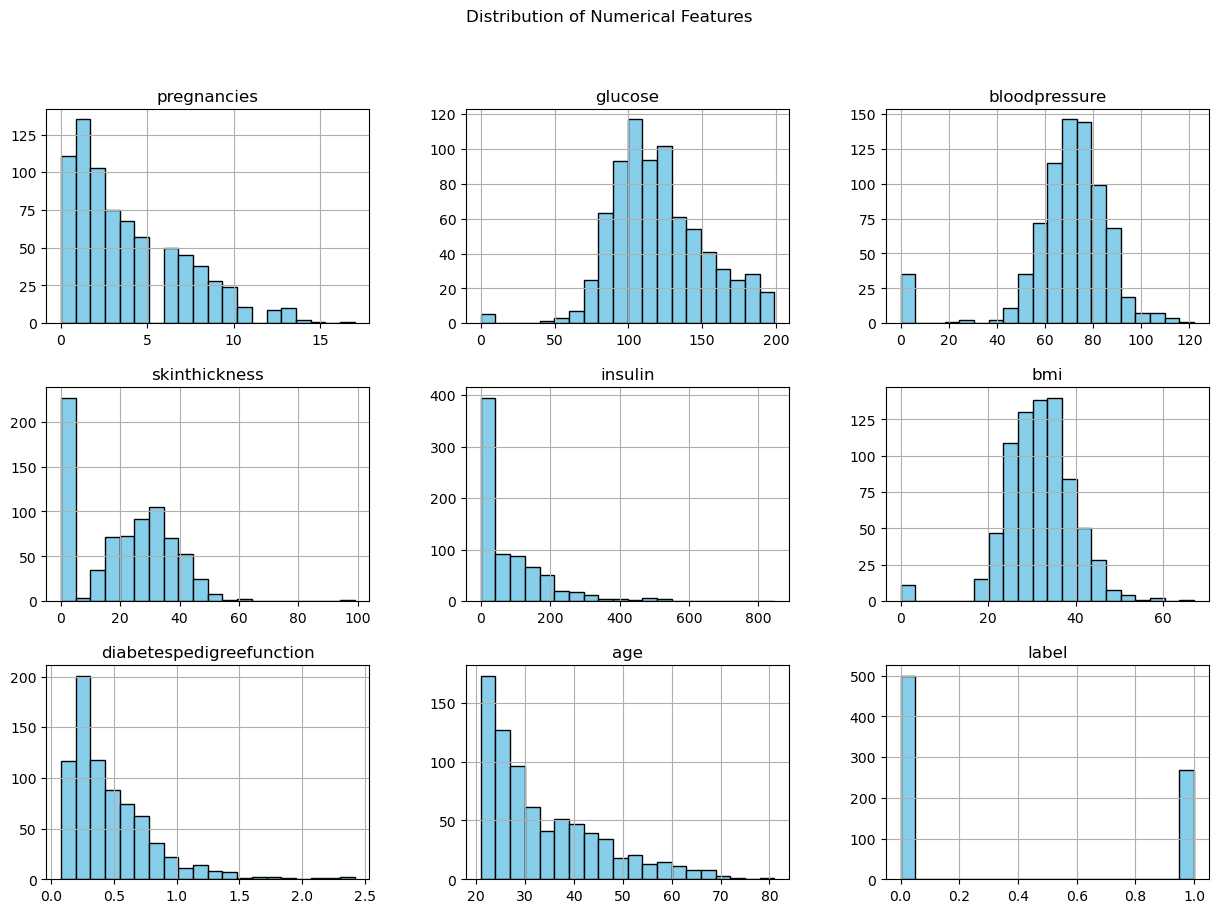

In [60]:
# Explore the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10),color="skyblue", edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

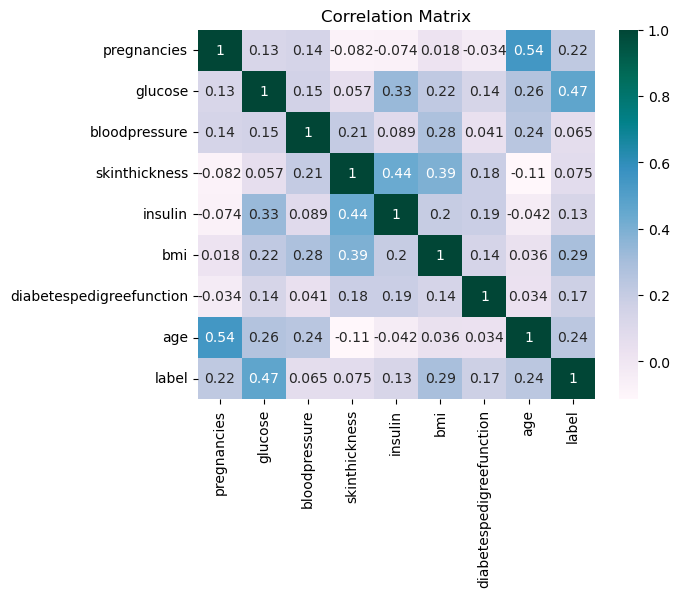

In [61]:
# Explore the correlation between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn')
plt.title('Correlation Matrix')
plt.show()

Given the domain of diabetes prediction, the identified correlations between features (age, pregnancy), (bmi, skin thickness), (insulin, skin thickness), and (glucose, insulin) can offer valuable insights. Here are some considerations for each pair of correlated features:

1. **(age, pregnancy):**
   - It's common for age and the number of pregnancies to be correlated in a dataset related to diabetes. As women age, they may have more pregnancies. This correlation might introduce bias.

2. **(bmi, skin thickness):**
   - The correlation between BMI and skin thickness could be expected, as BMI is a measure of body composition that includes skin and subcutaneous tissue. In individuals with higher BMI, there might be more subcutaneous fat, leading to increased skin thickness

3. **(insulin, skin thickness):**
   - The correlation between insulin and skin thickness may be indicative of underlying physiological factors like metabolism and might not directly indicator of diabetes.

4. **(glucose, insulin):**
   - The correlation between glucose and insulin is expected, as insulin levels often respond to changes in blood glucose levels. However, it's essential to ensure that the correlation is not excessively high, which could potentially introduce multicollinearity issues in predictive modeling.

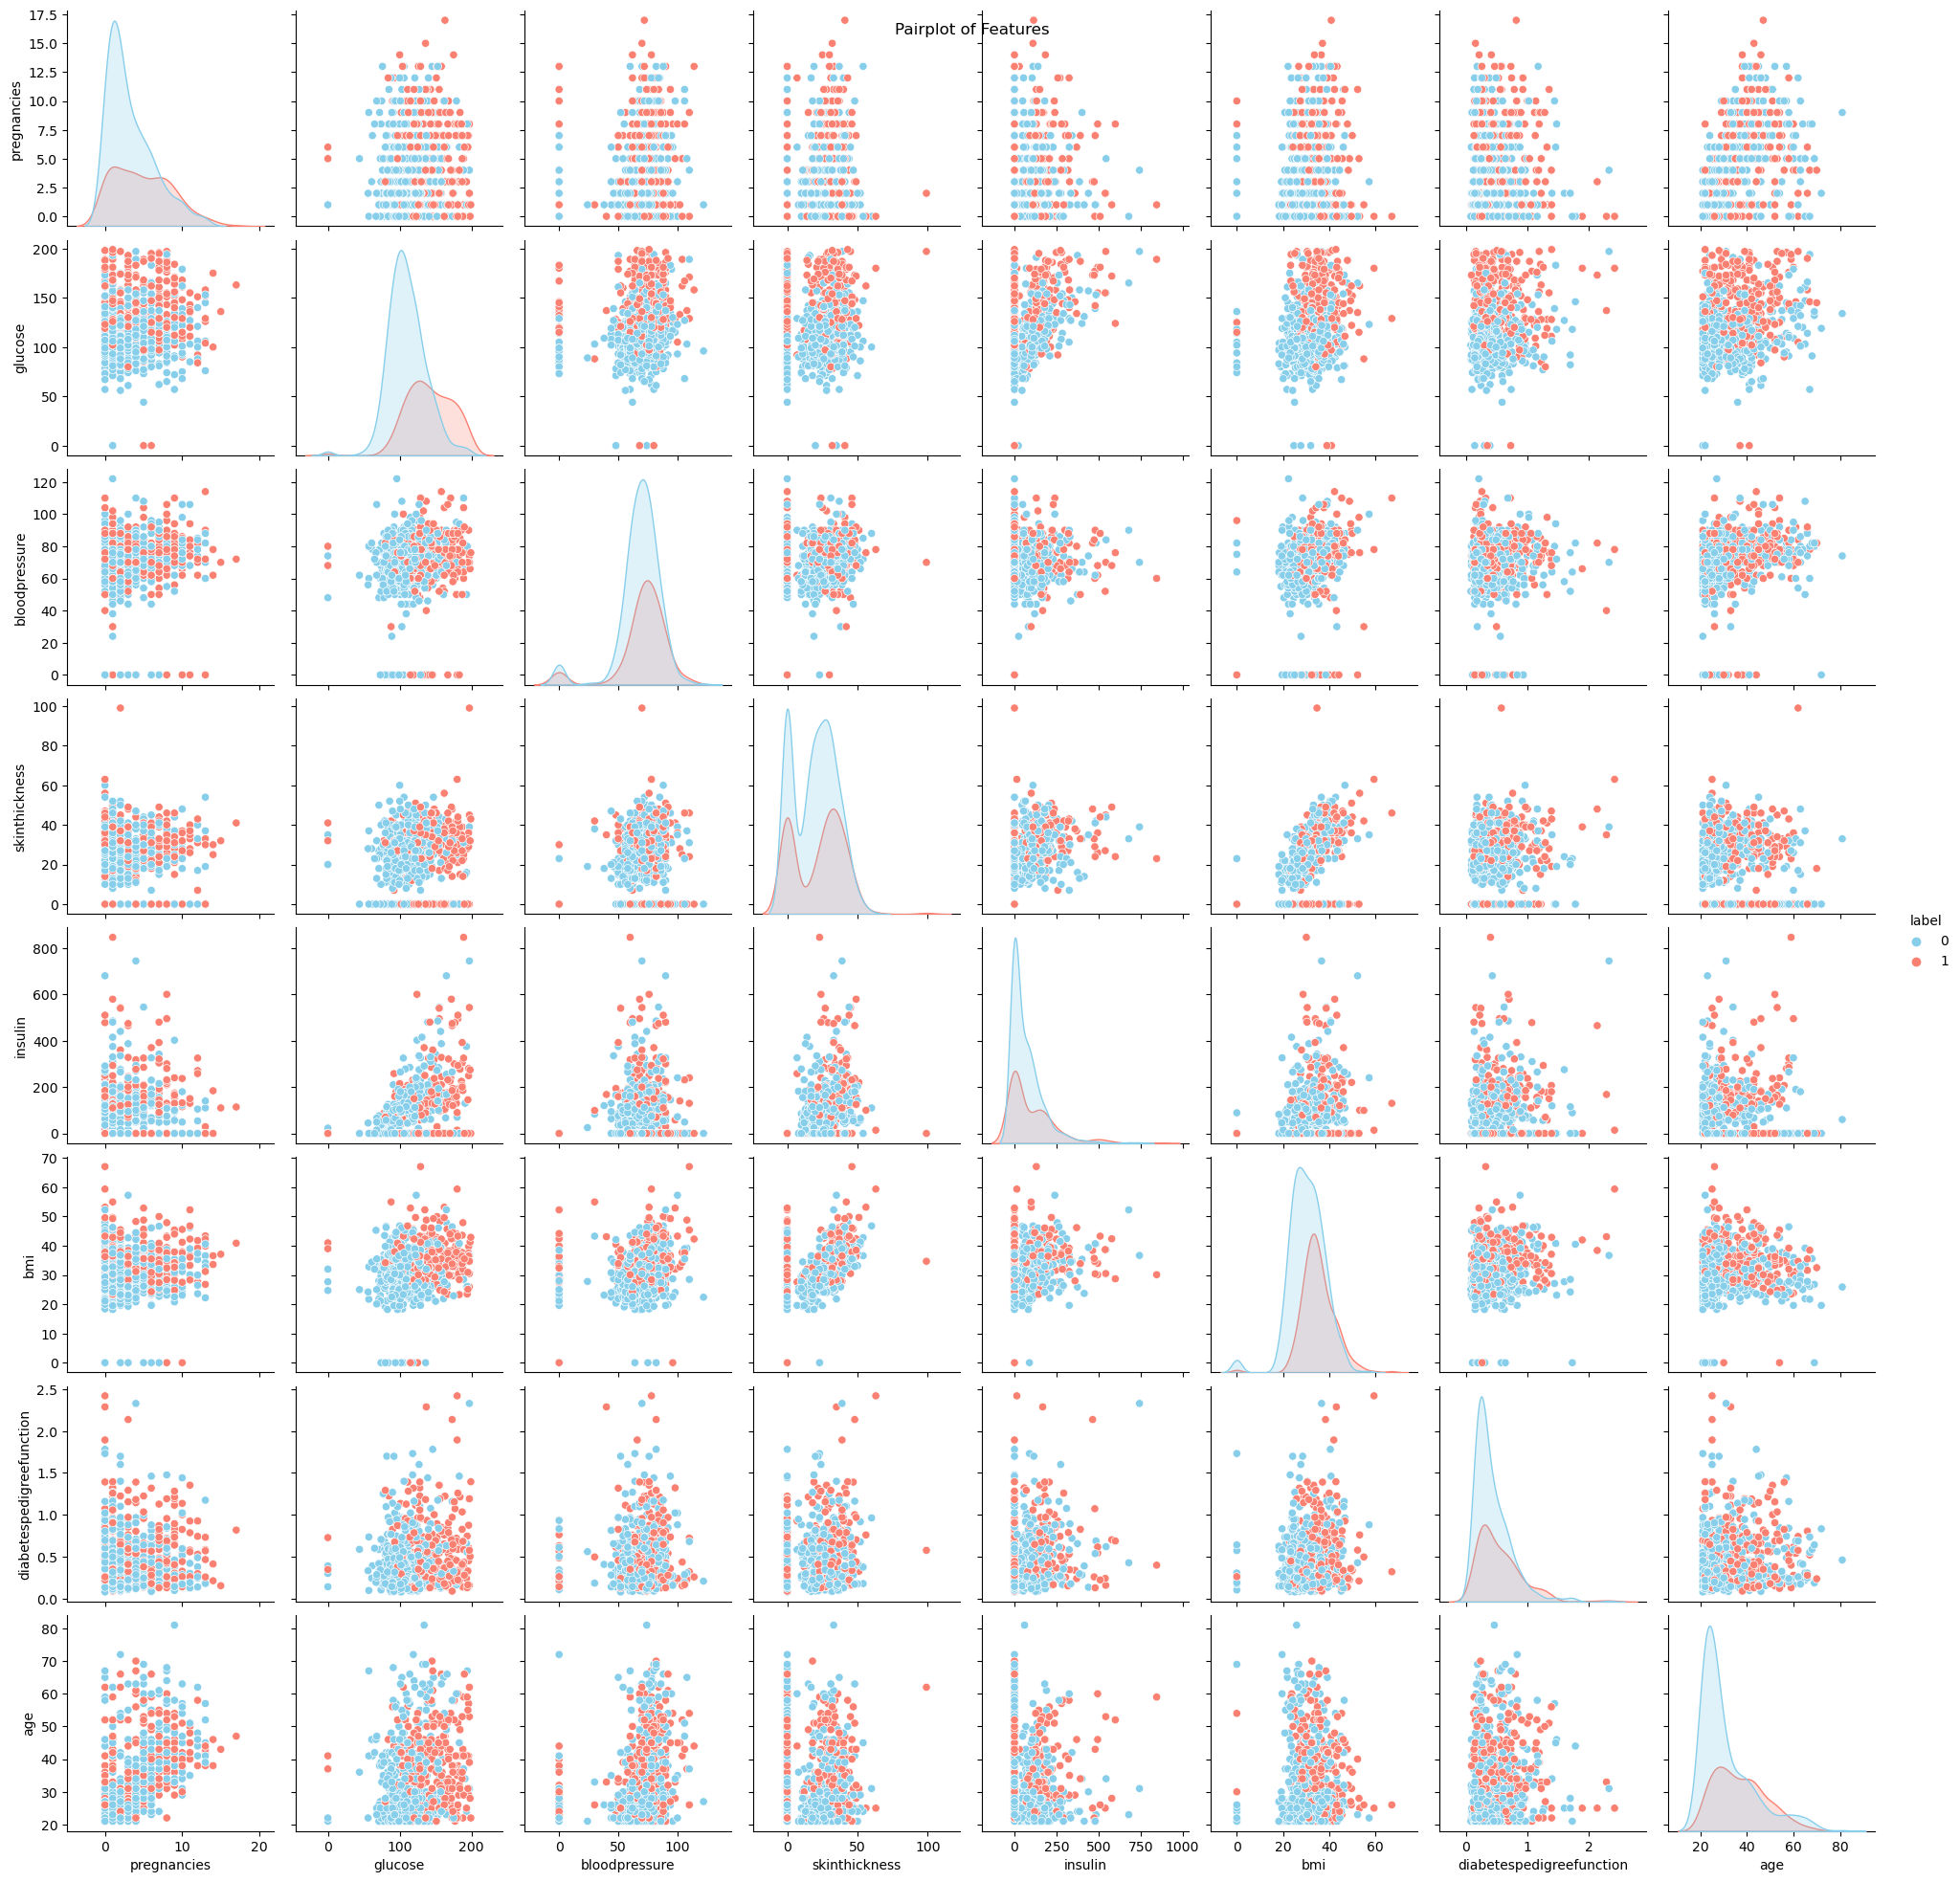

In [62]:
# Explore relationships between features and the target variable
sns.pairplot(df, hue='label', diag_kind='kde',palette=custom_palette)
plt.suptitle('Pairplot of Features')
plt.show()

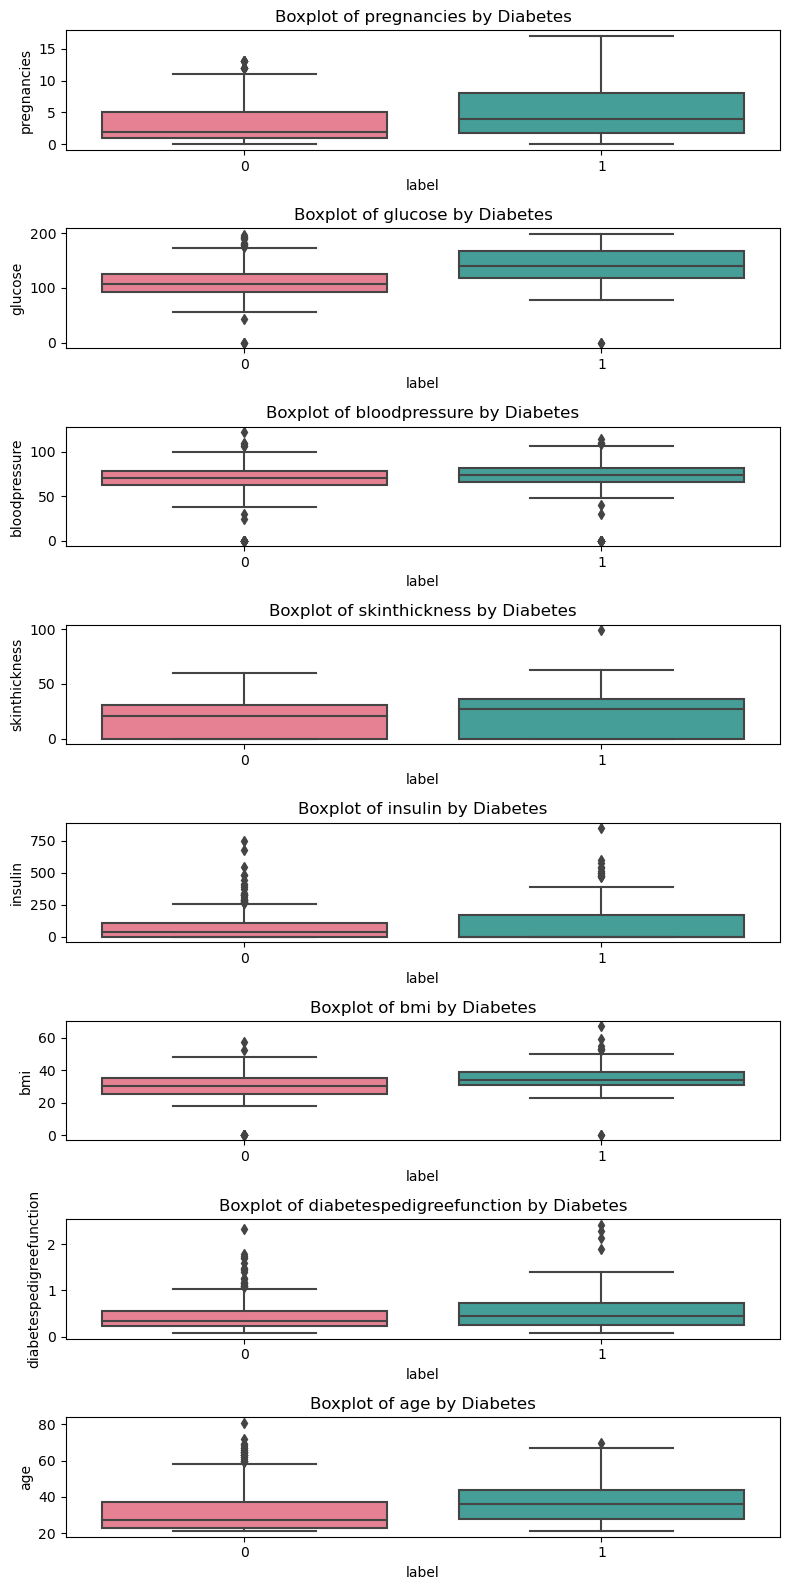

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'features' is a list of feature names
features = df.columns[:-1]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, len(features) * 2))

# Set a custom color palette
custom_palette = sns.color_palette("husl", 2)

# Plot boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='label', y=feature, data=df, palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Diabetes')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

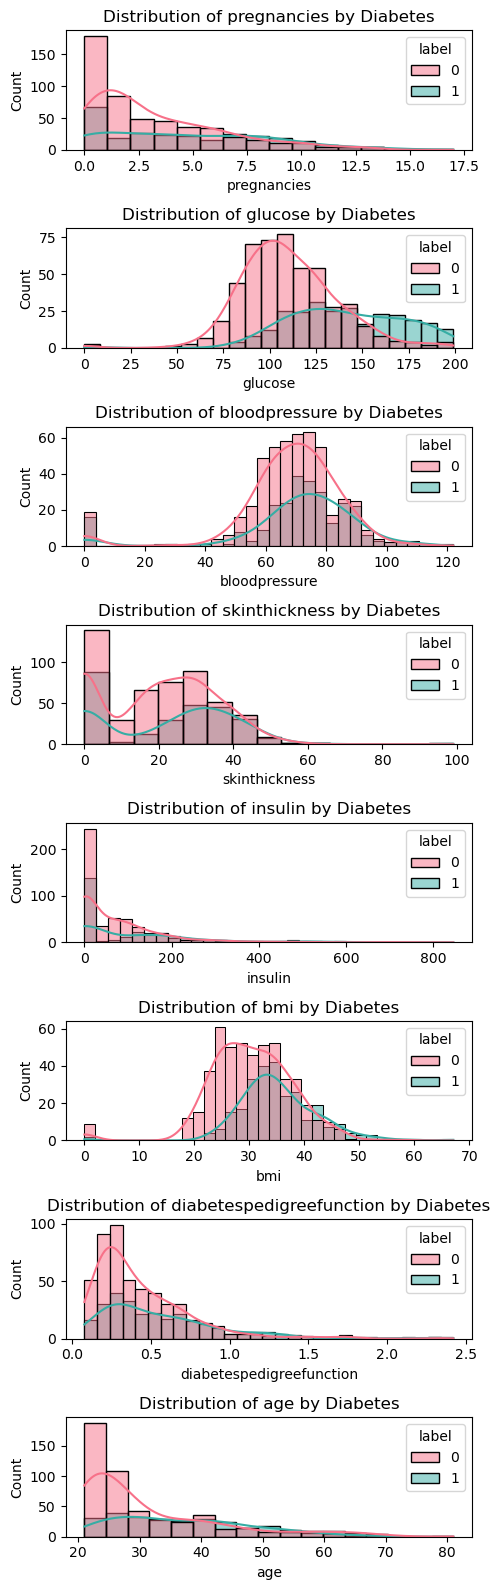

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'features' is a list of feature names
features = df.columns[:-1]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(5, len(features)*2))

# Set a custom color palette
custom_palette = sns.color_palette("husl", 2)

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(x=feature, hue='label', data=df, kde=True, palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Diabetes')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [65]:
# Create a feature for insulin sensitivity (insulin * glucose)
df['insulin_sensitivity'] = df['insulin'] * df['glucose']

# Create a feature representing the product of glucose and BMI
df['glucose_bmi_product'] = df['glucose'] * df['bmi']

# Display the DataFrame with the new features
#df.drop(columns=['insulin'],inplace=True)
print("DataFrame with New Features:")
print(df)

DataFrame with New Features:
     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  label  insulin_sensitivity  \
0               

In [66]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify and remove outliers based on IQR
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outliers_iqr]

# Display the DataFrame without outliers using IQR
print("DataFrame without outliers (IQR method):")
print(df)

DataFrame without outliers (IQR method):
     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  label  insulin_sensitivity  \
0   

In [67]:
x = df.drop(columns=['label'])
y = df['label']
cols = x.columns
index = x.index

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x = transformer.transform(x)
x = pd.DataFrame(x, columns = cols, index = index)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

'''x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape'''

'x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=123)\nx_train.shape, x_test.shape, y_train.shape, y_test.shape'

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=123)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Decision Tree hyperparameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5)
dt_grid_search.fit(x_resampled, y_resampled)

best_params_dt = dt_grid_search.best_params_
best_params_dt

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion=best_params_dt['criterion'],max_depth=best_params_dt['max_depth'],min_samples_leaf=best_params_dt['min_samples_leaf'],min_samples_split=best_params_dt['min_samples_split'])
dtc.fit(x_resampled, y_resampled)

dtc.feature_importances_

array([0.04020965, 0.07249444, 0.04455866, 0.05319437, 0.        ,
       0.02759283, 0.11178851, 0.14487908, 0.00087393, 0.50440852])

In [71]:
y_pred = dtc.predict(x_test)
decision_tree_acc = accuracy_score(y_test, y_pred)
decision_tree_acc

0.7956989247311828

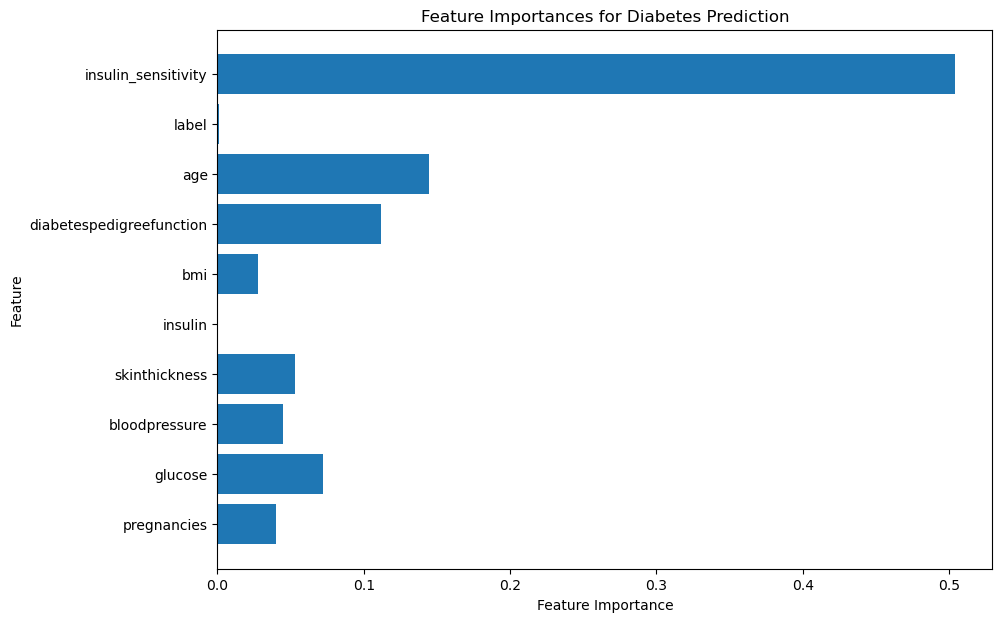

In [72]:
def plot_feature_importances_diabetes(model, feature_names):
    n_features = len(feature_names)
    
    plt.figure(figsize=(10, 7))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances for Diabetes Prediction")
    plt.show()

# Example usage:
# Replace 'diabetes_features' with the actual list of feature names in your dataset
# Call the function with the model and feature names
plot_feature_importances_diabetes(dtc, df.columns[:-1].tolist())

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVC hyperparameter grid
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svc_grid_search = GridSearchCV(SVC(random_state=42), svc_param_grid, cv=5)
svc_grid_search.fit(x_resampled, y_resampled)

best_params_svc = svc_grid_search.best_params_
best_params_svc

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [74]:
from sklearn.svm import SVC

svc = SVC(C=best_params_svc['C'],gamma=best_params_svc['gamma'],kernel=best_params_svc['kernel'])

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example for Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(x_resampled, y_resampled)

best_params_rf = rf_grid_search.best_params_
best_params_rf

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [76]:
# Example: Adjusting the maximum depth of a decision tree
model = RandomForestClassifier(max_depth=best_params_rf['max_depth'],max_features=best_params_rf['max_features'],min_samples_split=best_params_rf['min_samples_split'],min_samples_leaf=best_params_rf['min_samples_leaf'],n_estimators=best_params_rf['n_estimators'], random_state=42)
model.fit(x_resampled, y_resampled)

RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42)

In [77]:
def train(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 42)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    

def model_evaluation(classifier,x_test,y_test):
    
    y_test_pred = classifier.predict(x_test)
    y_train_pred = classifier.predict(x_resampled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_resampled, y_train_pred)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Greens',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Cross Validation Score :  94.11%
Training Accuracy: 0.9983498349834984
Testing Accuracy: 0.7634408602150538
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        68
           1       0.57      0.48      0.52        25

    accuracy                           0.76        93
   macro avg       0.70      0.67      0.68        93
weighted avg       0.75      0.76      0.76        93



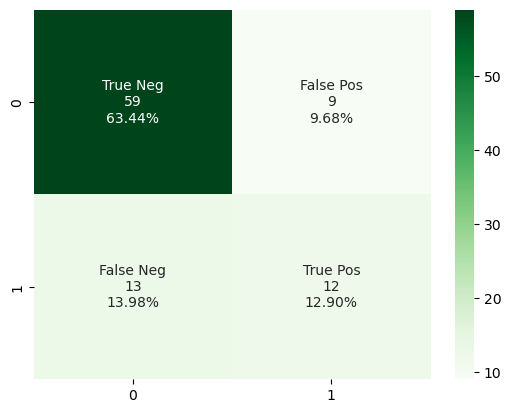

In [78]:
# Training the model
train(svc, x_resampled, y_resampled, x_test, y_test)

# Evaluate the model
model_evaluation(svc, x_test, y_test)

Cross Validation Score :  91.26%
Training Accuracy: 0.9900990099009901
Testing Accuracy: 0.7849462365591398
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        68
           1       0.57      0.80      0.67        25

    accuracy                           0.78        93
   macro avg       0.74      0.79      0.75        93
weighted avg       0.82      0.78      0.79        93



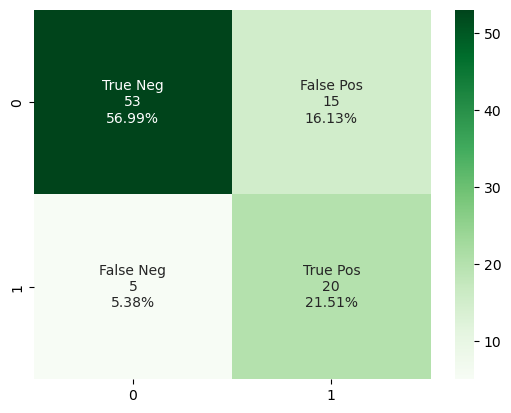

In [79]:
# Training the model
train(model, x_resampled, y_resampled, x_test, y_test)

# Evaluate the model
model_evaluation(model, x_test, y_test)

Cross Validation Score :  81.39%
Training Accuracy: 0.8712871287128713
Testing Accuracy: 0.7956989247311828
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        68
           1       0.59      0.76      0.67        25

    accuracy                           0.80        93
   macro avg       0.75      0.78      0.76        93
weighted avg       0.82      0.80      0.80        93



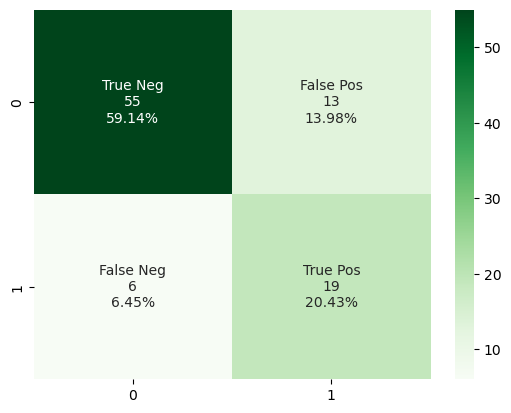

In [80]:
# Training the model
train(dtc, x_resampled, y_resampled, x_test, y_test)

# Evaluate the model
model_evaluation(dtc, x_test, y_test)

In [81]:
from sklearn.linear_model import LogisticRegression

# Example for Logistic Regression hyperparameter tuning
log_reg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

log_reg_grid_search = GridSearchCV(LogisticRegression(random_state=42), log_reg_param_grid, cv=5)
log_reg_grid_search.fit(x_resampled, y_resampled)

best_params_log_reg = log_reg_grid_search.best_params_
best_params_log_reg

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [82]:
from sklearn.linear_model import LogisticRegression
#fitting data in Logisticregression

logreg = LogisticRegression(penalty=best_params_log_reg['penalty'],C=best_params_log_reg['C'],solver=best_params_log_reg['solver'])

Cross Validation Score :  83.26%
Training Accuracy: 0.8712871287128713
Testing Accuracy: 0.7956989247311828
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        68
           1       0.59      0.76      0.67        25

    accuracy                           0.80        93
   macro avg       0.75      0.78      0.76        93
weighted avg       0.82      0.80      0.80        93



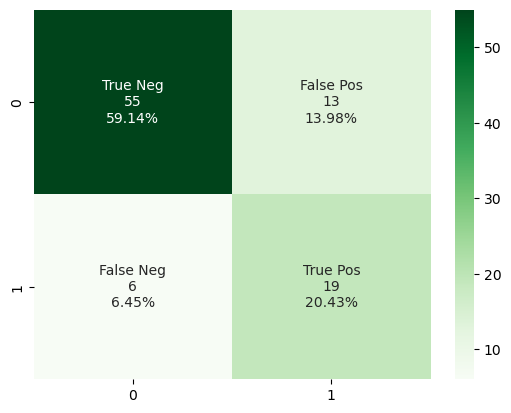

In [83]:
# Training the model
train(logreg, x_resampled, y_resampled, x_test, y_test)

# Evaluate the model
model_evaluation(dtc, x_test, y_test)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Example for KNN hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(x_resampled, y_resampled)

best_params_knn = knn_grid_search.best_params_
best_params_knn

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Cross Validation Score :  90.06%
Training Accuracy: 0.8712871287128713
Testing Accuracy: 0.7956989247311828
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        68
           1       0.59      0.76      0.67        25

    accuracy                           0.80        93
   macro avg       0.75      0.78      0.76        93
weighted avg       0.82      0.80      0.80        93



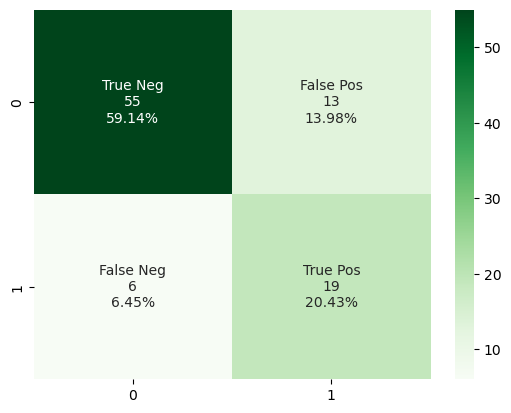

In [85]:
knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],weights=best_params_knn['weights'],p=best_params_knn['p'])
train(knn, x_resampled, y_resampled, x_test, y_test)

# Evaluate the model
model_evaluation(dtc, x_test, y_test)